In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('nyc-rolling-sales.csv')
sale = data.copy()
count = data.copy()

cols = data.columns
cols

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [2]:
import seaborn as sns
import scipy.stats as stats

In [3]:
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])
data['YEAR'] = data['SALE DATE'].apply(lambda x: x.year)
data['MONTH'] = data['SALE DATE'].apply(lambda x: x.month)
data['DAY'] = data['SALE DATE'].apply(lambda x: x.day)

data = data.drop('SALE DATE', axis=1)

In [4]:
data['SALE PRICE'] = data['SALE PRICE'].replace(' -  ', np.NaN).astype(np.float)
data = data.dropna(axis=0).reset_index(drop=True)

In [5]:
data = data.drop(['Unnamed: 0','EASE-MENT','APARTMENT NUMBER'],axis =1)

In [6]:
for column in ['BOROUGH']:
    data[column] = data[column].astype(int)

In [31]:
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].replace(' -  ', np.NaN).astype(np.float)
data = data.dropna(axis=0).reset_index(drop=True)
for column in ['GROSS SQUARE FEET']:
    data[column] = data[column].astype(int)
for column in ['GROSS SQUARE FEET','SALE PRICE']:
    data[column] = data[column].replace(0,np.NaN).astype(np.float)
    data = data.dropna(axis=0).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29334 entries, 0 to 29333
Data columns (total 23 columns):
BOROUGH                           29334 non-null object
NEIGHBORHOOD                      29334 non-null object
BUILDING CLASS CATEGORY           29334 non-null object
TAX CLASS AT PRESENT              29334 non-null object
BLOCK                             29334 non-null int64
LOT                               29334 non-null int64
BUILDING CLASS AT PRESENT         29334 non-null object
ADDRESS                           29334 non-null object
ZIP CODE                          29334 non-null int64
RESIDENTIAL UNITS                 29334 non-null int64
COMMERCIAL UNITS                  29334 non-null int64
TOTAL UNITS                       29334 non-null int64
LAND SQUARE FEET                  29334 non-null object
GROSS SQUARE FEET                 29334 non-null float64
YEAR BUILT                        29334 non-null int64
TAX CLASS AT TIME OF SALE         29334 non-null int64
BU

In [8]:
data['SALE PRICE'].min()

1.0

In [9]:
boroughs ={1:'Manhattan' , 2:'Bronx' , 3:'Brooklyn', 4:'Queens' , 5:'Staten Island'}
data['BOROUGH'].replace(boroughs,inplace=True)

In [10]:
data['PRICE PER SQR FOOT'] = data['SALE PRICE'] / data['GROSS SQUARE FEET']
boro

NameError: name 'boro' is not defined

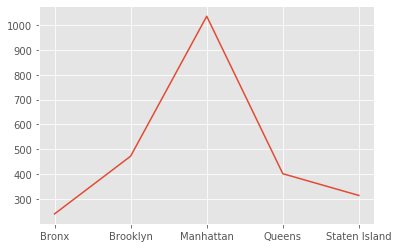

In [27]:
boro = data.groupby(['BOROUGH']).mean()
plt.plot(boro['PRICE PER SQR FOOT'])

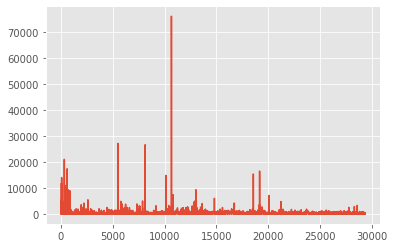

In [12]:
plt.plot(data['PRICE PER SQR FOOT'])

In [13]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [14]:
data.sort_values('PRICE PER SQR FOOT')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,YEAR,MONTH,DAY,PRICE PER SQR FOOT
8154,Brooklyn,DOWNTOWN-METROTECH,21 OFFICE BUILDINGS,4,2058,17,O6,339 BRIDGE STREET,11201,0,...,49122,457966.0,1990,4,O6,1.0,2017,3,15,0.000002
2430,Bronx,MELROSE/CONCOURSE,08 RENTALS - ELEVATOR APARTMENTS,2,2465,25,D7,1240 WALTON AVENUE,10452,162,...,40046,171044.0,1928,2,D7,1.0,2017,6,21,0.000006
28484,Staten Island,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,301,W1,MILFORD DRIVE,0,0,...,78672,126468.0,1965,4,W1,1.0,2016,12,9,0.000008
755,Manhattan,SOHO,21 OFFICE BUILDINGS,4,599,64,O6,375 HUDSON STREET,10014,0,...,69096,907938.0,1987,4,O6,10.0,2017,8,14,0.000011
825,Manhattan,UPPER EAST SIDE (59-79),38 ASYLUMS AND HOMES,4,1468,5,N9,405 EAST 73RD STREET,10021,77,...,10217,82600.0,1990,4,N9,1.0,2016,11,1,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Manhattan,MIDTOWN EAST,07 RENTALS - WALKUP APARTMENTS,2B,1369,35,C4,428 EAST 58TH STREET,10022,8,...,2058,4960.0,1900,2,C4,86000000.0,2017,3,16,17338.709677
340,Manhattan,HARLEM-CENTRAL,29 COMMERCIAL GARAGES,4,2013,44,G5,122-124 WEST 145 STREET,10039,0,...,13875,322.0,1972,4,G5,6750000.0,2016,12,22,20962.732919
8137,Brooklyn,DOWNTOWN-FULTON MALL,11A CONDO-RENTALS,2,165,1001,RR,236 LIVINGSTON STREET,11201,8,...,18175,5802.0,2009,2,RR,154250000.0,2016,12,15,26585.660117
5508,Brooklyn,BEDFORD STUYVESANT,29 COMMERCIAL GARAGES,4,1734,70,G5,793 BEDFORD AVENUE,11205,0,...,13225,420.0,1995,4,G5,11375000.0,2017,4,26,27083.333333


In [15]:
def boro_dist(data):
    for name,data in data.groupby('BOROUGH'):
        plt.boxplot(data['PRICE PER SQR FOOT'])

In [32]:
#data_without_out
df_bar_1 =data[['BOROUGH', 'PRICE PER SQR FOOT']]
data['z_scores']=stats.zscore(data['PRICE PER SQR FOOT'])
data_without_out = data.copy()
data_without_out = data_without_out.loc[data_without_out['z_scores'].abs()<=3]
data_without_out

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,YEAR,MONTH,DAY,PRICE PER SQR FOOT,z_scores
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,...,6440.0,1900,2,C2,6625000.0,2017,7,19,1028.726708,0.941231
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,...,6794.0,1913,2,C4,3936272.0,2016,9,23,579.374742,0.257384
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,...,4615.0,1900,2,C2,8000000.0,2016,11,17,1733.477790,2.013757
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,...,4226.0,1920,2,C4,3192840.0,2016,9,23,755.522953,0.525455
4,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,...,18523.0,1920,2,D9,16232000.0,2016,11,7,876.315932,0.709284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29329,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,...,2575.0,1998,1,B9,450000.0,2016,11,28,174.757282,-0.358383
29330,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,...,2377.0,1998,1,B9,550000.0,2017,4,21,231.384098,-0.272206
29331,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,...,1496.0,1925,1,B2,460000.0,2017,7,5,307.486631,-0.156389
29332,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,...,64117.0,2001,4,K6,11693337.0,2016,12,21,182.374986,-0.346790


None


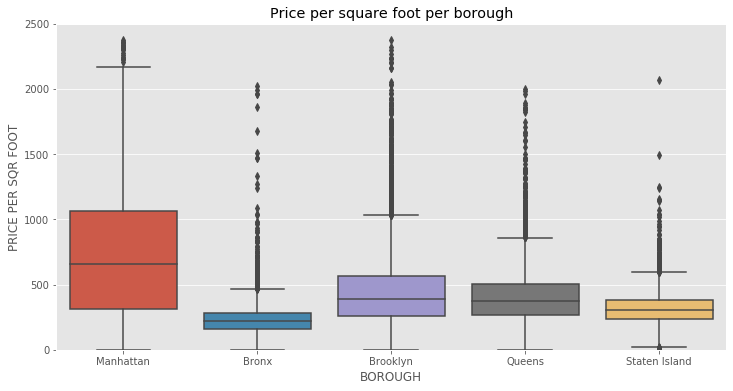

In [29]:

df_bar =data[['BOROUGH', 'PRICE PER SQR FOOT',]].groupby(by='BOROUGH').mean().sort_values(by='PRICE PER SQR FOOT', ascending=True).reset_index()

def box_plot_wo_out(data = data_without_out):
    plt.figure(figsize=(12,6))
    g = sns.boxplot(x = 'BOROUGH',y = 'PRICE PER SQR FOOT',data = data_without_out)
    plt.title('Price per square foot per borough')
    g.set(ylim=(0,2500))
print(box_plot_wo_out(data = data_without_out))

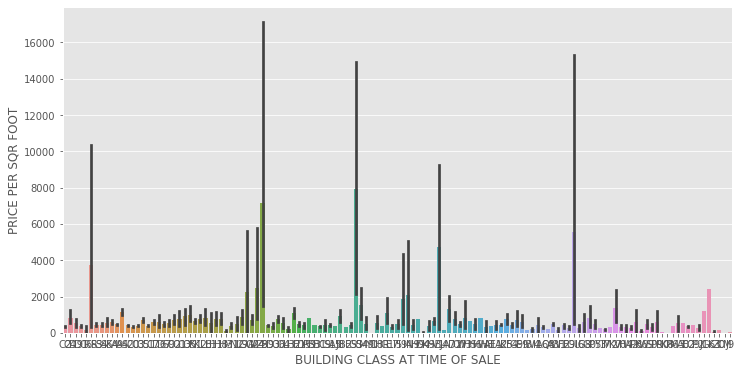

In [18]:
plt.figure(figsize=(12,6))
g = sns.barplot(x = 'BUILDING CLASS AT TIME OF SALE',y = 'PRICE PER SQR FOOT',data = data_without_out)
g

In [ ]:
data_without_out.groupby

In [28]:
boro

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,YEAR,MONTH,DAY,PRICE PER SQR FOOT,z_scores
BOROUGH,,,,,,,,,,,,,,,
Bronx,4135.500854,78.705866,10455.577733,4.360763,0.195046,4.554670,5557.876139,1939.250285,1.273918,1.021973e+06,2016.654043,6.536446,16.831150,240.439395,-0.258425
Brooklyn,4742.157324,53.338408,11218.913956,2.723529,0.189965,2.911765,3793.622491,1928.193426,1.289619,1.508023e+06,2016.655709,6.523875,16.529066,472.584275,0.094865
Manhattan,1311.879208,55.160396,10029.490099,19.362376,2.233663,21.588119,38153.306931,1921.115842,2.335644,1.855808e+07,2016.573267,7.027723,16.668317,1035.078683,0.950897
Queens,8013.055967,54.053439,11391.189023,2.201300,0.412981,2.613558,2977.492327,1938.606337,1.144521,9.123055e+05,2016.647229,6.641542,16.741018,402.049353,-0.012479
Staten Island,3366.547591,81.907780,10301.915087,1.355450,0.098341,1.452607,2364.205964,1967.471959,1.078199,5.286038e+05,2016.629937,6.556872,16.181872,314.610444,-0.145548
